* OX, 괄호 채우기: 점수 비중 높음
* 수식: 계산을 낼 생각 있음
> key formula 정도는 알았으면 좋겠다. 이쪽이 더 중요. 개념이 엄청 많았음. 새로운 개념들을 이해하는 정도.
>
> 1~2 문제 정도는 간단한 계산 쓰는 거? 기본 정의. posterior, conjugate 등
>
> 코드는 결과 해석하는 것 정도? 한 번 정도는 제대로 리뷰해봐야 할 듯

`-` 질문

* 자료 오류? IS에서 $w_i f(z_i)$의 분산 수식이 잘못된 것 같음
* $\int k(x, y)\pi(x)dx = \pi(y), ~ \int k(y, x)\pi(y)dx = \pi(y)$ 아닌가요? 앞부분은 전이 전과 후의 확률 동일: stationary condition. 적분기호 안쪽 두 식이 같으면 detailed balance.

* Risk of transfer learning에서 Number of tasks $t$가 의미하는 것이 어느 태스크임? 논문에서는 $\mathcal V$의 태스크 수인 것 같은데, 그럼 좀 이상한 거 아닌가? 태스크가 많아지는데 복잡도가 줄어듦?

* bernoulli-uniform에서 $r=1$인 경우가 $w$랑 똑같으니까 그냥 posterior의 평균 바로 구하면 되는 거 아님?

* posterior 계산에서 sampling을 사용하는 이유가 결론적으론 분자를 적분하기 어려워서 하는 게 맞음? 일단 $p(x~|~\theta)p(\theta)$의 형태는 주어진 것 아님? 그럼 그냥 수치적으로 적분해서 분포를 뽑아내면 안되나? $\to$ 파라미터가 많으면 수치적으로도 어렵겠네. 그러네
> posterior의 정확한 분포 없이도 샘플을 뽑아낼 수 있도록 만듦. 그 샘플로부터 posterior의 분포를 추정(모양과 통계적 특성)

## 1. AI에 대한 개괄적 설명

### **A. 인공지능**

명확하게 정리된 유일한 정의는 없음

`-` **AI에 대한 기술적 정의 (Technical definition)**:
* 인간의 오감과 관련된 정보를 통합하여 분석, 학습, 예측
* 의사결정 수행
* 새로운 정보 학습 시 이전에 배운 정보를 유지하여 학습 가능: Continual Learning $\to$ 새로운 태스크 데이터 학습 시 기존의 특정 태스크 정보가 점점 잊혀지는데, 이를 해결
* 언어 처리와 메타 러닝 등을 수행할 수 있음

`-` 뇌과학 관점에서의 인공지능

* Neural Network
* 인간의 뇌를 모방

`-` 공학적 관점에서의 인공지능

* XOR 문제의 해결을 위한 Multi-Layer-Perceptron
* 통계학에서의 비선형 모델링 $y = f(x) + \epsilon$ -> $f$의 설계
* MLP $f = g_2 \circ g_1$ : 미분 어려움, 해석에서 문제 있음
> Complexity 훨씬 높음, 다양한 문제에 적용 가능 $\to$ DNN

`-` Application Example

* Precision Medicine: 의료의 개인화 Personalization
* Virtual Assistant: 가상 비서
* Expert System
* Auto Driving

* Reasoning
* 인간의 지도 없이 자율적인 의사결정 및 작업 수행: Agentic AI
* 인간에 삶에 광범위하고 밀접하게 사용: Physical AI
* Computer Vision/Speech/Expert System은 이미 인간을 능가하였음
* Continuous learning/Meta learning/Reinforcement learning에서 상당한 발전

### **B. DNN**

`-` Simple DNN (Multi-Layer Perceptron; MLP)

$$f({\boldsymbol x}) = a(g_L \circ g_{L-1} \circ \cdots \circ g_1 ({\boldsymbol x}))$$

* $g_l(\boldsymbol x) = \sigma ({\boldsymbol W_l \boldsymbol x +  \boldsymbol b_l})$이며, 해당 함수 $f$는 레이블 예측에 활용됨. 파라미터를 통해 학습되는 함수.
* $\sigma$는 활성화 함수(activation function)이며, $a(\cdot) = {\boldsymbol W_a ~ \cdot} + {\boldsymbol b_a}$는 스칼라 함수 또는 벡터 함수임(netout 벡터를 반환)

$$\begin{bmatrix} h_1 \\ h_2 \end{bmatrix} = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$$

> 단순 레이어 변환. 선형 변환임: $\boldsymbol W_l  \boldsymbol x$의 형태

$$\begin{bmatrix} h_1 \\ h_2 \end{bmatrix} = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \overset{\sigma}{\to} \begin{bmatrix} \sigma (h_1) \\ \sigma (h_2) \end{bmatrix}$$

> 해당 선형 변환에 ReLU, sigmoid 등의 비선형 변환(activation function)을 추가하여 복잡한 형태를 만들어냄. $W$의 차원은 자유롭게 설정 가능

`-` 인간의 뉴런과 DNN의 차이

* **Activation** : 전기 신호 $\approx$ 활성화 함수
> 인간의 뇌의 시냅스 연결 - 무작위적, 비정형
>
> DNN의 퍼셉트론 간 연결 - 선형적?, 정형 (Dropout은 무작위적 연결을 일부 모방)

* **역전파 backpropagation**
> 인간의 뇌 - 전체를 바꾸지 않고 일부만 변경하는 것이 가능
>
> DNN - 개별 weight만 바꿀 수 없음. 모든 뉴런을 다 변경해야 함 $\to$ 비효율적, complexity 제약

`-` **Loss function**

$$l(y, f({\boldsymbol x}))$$

* $l$은 일반적으로 convex function을 가정: CrossEntropy, MSE
* $f(x)$가 정해져 있다면 loss function 자체만으로는 convex 하지만, $f$의 형태가 $\theta$에 의해 바뀌기 때문에 loss function은 convex하지 않아 최적화가 어려움
* 신경망의 앞부분은 Feature Extractor의 역할, 뒷부분은 손실 측정의 역할
* $\theta$의 비중이 압도적으로 큼. 즉, Feature extractor가 중요한 정보를 가지고 있음.

`-` 다양한 활용

* **CNN**: `Convolution Kernel`을 도입하여 엣지 탐색, characterize로 이미지를 신경망이 더 잘 이해할 수 있도록 도움
* **Shallow NN**: hidden layer가 두 개 이하인 경우 사용하기도 하는 표현
* **Gradient vanishing**: Activation funciton 중 `sigmoid`,`tanh`는 각각 최대 편미분 값이 0.25, 1이기 때문에 레이어가 깊어질 수록 편미분 값들이 반복적으로 곱해지면서 1보다 작아지게 되고 기울기가 소실되도록 한다. 따라서 `ReLU`, `leaky ReLU`와 같이 적당한 범위 내에 값을 가질 수 있도록 하는 활성화 함수를 선호한다. ↔ exploding
* **Batch normalization**: 배치 단위로 입력을 정규화. 파라미터 스케일에 대한 민감도를 낮추는 역할
* **Dropout**: 인간의 뇌가 랜덤하게 connection된다는 점을 모방하여 학습을 부드럽게 만듦
* **Skip connection**: 레이어 연결 과정에서 몇 개의 층을 스킵하여 그래디언트 계산이 쉽도록 만듦
* **Regularization**: 손실함수에 패널티를 추가하여 파라미터 크기를 너무 크지 않도록 억제

`-` **Stochastic Gradient Descent** : 랜덤 배치를 사용하는 경사 하강법

* 전체 데이터 대신 무작위로 선택한 mini-batch를 사용하여 그래디언트를 계산, 작은 learning rate로 업데이트하는 과정을 반복
* 일부의 데이터만 손실함수 계산에 사용함으로써 손실함수 개형을 바꿈
* loss를 감소시키기는 어려우나, 특정 구간을 넘어가면 loss function의 flat 구간에 도착할 것으로 생각하고 최적화
* 미니배치를 사용함에 따라 그래디언트에 노이즈를 발생시켜 bad local minimum에서 탈출시킬 수 있도록 도울 수 있음

$$W_t \leftarrow W_{t-1} - η \nabla l_{W_{t-1}}(\mathcal{B})$$

* 이론적으로 learning_rate는 step $t$마다 일정한 규칙에 의해 줄어드는 것이 이상적임 $\sum_t η_t = \infty, ~ \sum_t η_t^2 < \infty \to \text{e.g.,} ~~ η_t = \frac1t$
* 실제로는 다양한 스케줄러가 사용되며, learning rate를 크게 만든 뒤 작게 조정하는 Cyclical learning rate는 NLP에서 사용하는 것이 좋다고 알려져 있음

`-` **Data Loader**

* 데이터의 용량이 매우 커서 GPU의 VRAM에 모두 올릴 수 없는 경우, 대용량의 데이터를 배치 단위로 나누어 순차적으로 GPU에 올려 학습
* 배치를 사용하더라도 LLM 학습에서는 입력 시퀀스의 길이를 증가시켜 최대 출력 토큰 길이를 향상시키기 위해 VRAM이 더 많이 필요하게 됨
* Data Loader는 CPU에서 미리 데이터를 준비한 뒤, GPU로 빠르게 전달하는 병렬 처리를 수행하여 효율적으로 배치를 관리

skip connection과 SGD가 Loss function의 개형을 평탄하게 바꾸어 global optimum에 도달하기 쉽게 만들었음

## 2. Transfer Learning (단순 전이 학습)

### **A. Basic**

`-` pre-trained model and target task

* pre-trained model이 주어졌을 때, 입력 데이터의 변환된 표현을 획득 가능
* 해당 표현은 새로운 문제에서 source와 target이 공통 요소를 가질 때 유용
> DNN에서 feature extractor 역할을 하는 부분은 다른 곳에 활용해도 잘 작동하지 않을까란 아이디어
>
> General한 pre-trained model을 다른 도메인에 적용

`-` Mathmetical Framework

$T, S$가 Target, Source domain이라고 할 때,

1. $g_i: X_s \to Y_s$ hypothesis of source tasks. (함수의 형태가 이런 꼴일 것이라는 가설을 세우는 느낌으로 이해)
2. $f: X_t \to Y_t$ hypothesis of target task. 배우고 싶은 요소

* common $c$, specific parts $w_i, v$로 hypothesis를 분해

$$g_i = w_i \circ c, ~ f = v \circ c$$

> $c$는 소스 데이터에서 학습 가능, $v$는 타겟 데이터로 학습 가능 $\to$ $v$만 배우면 됨
>
> 대용량의 데이터셋으로 훈련된 모델 $g_i$와, $f$가 공유하는 특징이 클 수록 전이학습이 효과적이다.

`-` Scratch, Freezing, Fine-Tuning

* 소스 모델의 마지막 output layer를 제거하고, target task를 위한 additional layers를 부착하여 end-to-end 구조로 구성됨
* Scratch: 전체 가중치를 랜덤 초기값으로 설정하고, target 데이터로 전체 모델을 학습. 전체 모델을 재훈련함으로써 데이터가 적은 경우 모형이 제대로 학습되지 못함
* Freezing: 소스 모델의 가중치는 동결한 채, additional layers만 훈련
* Fine-Tuning: 소스 모델의 가중치를 초기값으로 설정하고, target 데이터로 전체 모델을 학습
* Hybrid: Feature Extractor(소스 모델)의 일부 레이어를 동결시키고, 일부 레이어만 기존 가중치를 초기값으로 하여 additional layers와 같이 훈련. 어떤 지점에서 구간을 잘라야 할 지 결정하는 문제가 있으므로, 일반적으로 활용되지는 않음

### **B. Mathmatical Frameworks**

`-` Risk of Transfer Learning

$C(\mathcal{C}), C(\mathcal{V})$를 $\mathcal{C}, \mathcal{V}$의 복잡도 측정값이라 하고, $t, n$을 각각 소스 태스크의 수와 개별 소스 태스크에서의 샘플 사이즈로, $m$을 타겟 태스크의 샘플 사이즈라고 할 때

$$\tilde{O} \left( \frac{1}{\nu} \sqrt{\frac{C(\mathcal{C}) + t C(\mathcal{V})}{nt}} + \sqrt{\frac{C(\mathcal{V})}{m}} \right)$$

* 현재 target sample size인 $m$을 키우기 어려운 상황이므로, 완전히 다른 태스크인 $\mathcal{V}$의 비중이 줄어들어야 한다. 즉, 소스와 타겟의 공통 태스크 $\mathcal C$의 비중이 커야 복잡도가 줄어든다.
* 또한 소스 모델이 큰 모델일 수록 $nt$의 값이 커져 복잡도가 감소한다.
* 즉, 좋은 소스 모델을 찾아서 타겟 문제를 해결하면 된다.

`-` Transfer Learning과 관련된 문제

* Meta Learning: 학습을 위한 학습. 여러 언어들을 배운 모델이 다른 언어를 쉽게 학습할 수 있을까?
* Adaptive Learning: 배운 지식을 공통점이 조금 있는 다른 분야에서 활용할 수 있을까?
* OOD: 학습 데이터의 분포와 평가 데이터의 분포가 다른 상황에서 모델이 정상 작동할 수 있을까? 현실에서의 문제 해결에 매우 중요.

## 3. Transfer Learning (2)

### **A. Domain Adaptation**

`-` Definition

* 소스 도메인의 데이터로 훈련된 모델을 관련된 다른 타겟 도메인에서 잘 작동하도록 만드는 기술

> Superviesd to Supervised
>
> 적은 라벨의 지도학습을 많은 라벨의 지도학습으로
>
> Unsupervised to Unsupervised: PCA 변환 행렬을 다른 데이터에 그대로 사용할 수 있는가?

`-` Examples

* 특정 지역의 저해상도의 이미지와 레이블 + 레이블링 되지 않은 고해상도 이미지
* 다수의 레이블로 처리된 시뮬레이션 이미지 + 더 적은 레이블의 실제 이미지

`-` Mathematical formulation

$$\begin{align} & p_t(x) \neq p_s(x) \\
& p_t(T(x)) = p_s(T(x)) \\
& p_t(y | T(x)) = p_s(y | T(x))
\end{align}$$

$p_t,~ p_s$가 타겟/소스 도메인의 분포이고, $T$를 변환이라고 할 때, 타겟과 소스의 분포를 일치시키는 변환 $T$를 찾는다.

* 서로 다른 분포의 소스/타겟 도메인이 존재할 때, $T$라는 변환은 각 도메인의 데이터 x에 대하여 $T(x)$가 같은 분포를 가지도록 만든다.
* 해당 변환을 찾을 수 있다면, 각 도메인에서 동일한 변환값이 주어졌을 때 label의 조건부 확률 분포는 동일해야 한다 $\to$ 변환하여 분류할 수 있는 형태로 주어진다.

> 현실에서 마지막은 이상적인 경우이며, $T$를 찾는 문제도 매우 어렵다. 보통 $T$를 찾고, 마지막 조건에 근접하도록 regularization 한다.
>
> 두 데이터가 하나의 확률 분포를 가지고 있으면 동일한 예측을 수행할 수 있다.

`-` **Metric Learning**

1. 두 점 $x_s^i,~ x_t^j$ 사이의 거리를 고려

$$d_W (x_s^i, x_t^j) = (x_s^i - x_t^j)^{\top} W (x_s^i - x_t^j)$$

> 유클리디안 거리의 제곱 수식에 positive semi-definite metrix $W$를 넣음.

2. $W$는 $W^{\frac12}$로 나타날 수 있으므로, 위 수식은 $W^{\frac12}x_s^i$와 $W^{\frac12}x_t^j$간 거리: 각 점을 변환한 상태에서의 거리라고 말할 수 있음. (선형 변환)

3. $x_s^i,~ x_t^j$의 레이블이 같다면, 변환 후 거리가 $u$를 넘기지 않아야 하며, 레이블이 다르다면 변환 후 거리가 $l$보다 길어야 함.

$$\text{arg} \min_{W ⪰ 0} Tr(W) - \log \text{det} (W) ~~ s.t.$$

$$d_W (x_s^i, x_t^j) ≤ u ~~~~ \text{if} ~~ y^i = y^j$$

$$d_W (x_s^i, x_t^j) ≥ l ~~~~ \text{if} ~~ y^i \neq y^j$$

`-` **Asymmetric Transformations**

1. 내적 기반 유사도를 사용 (Inner product-based similarity)

$$\text{sim}_W (x_s^i, x_t^j) = {x_s^i}^{\top} W x_t^j$$

> 내적의 값이 클수록 유사하지 않은 것

2. Loss function

$$\mathbb{I}(y_s^i = y_t^j) (\max(0, l - {x_s^i}^{\top} W x_t^j))^2 + \mathbb{I}(y_s^i \neq y_t^j) (\max(0, {x_s^i}^{\top} W x_y^j - u))^2 + \lambda ||W||_F$$

* 0보다 작을 수 없는 Loss function
* 같은 레이블일 경우 l보다 큰 유사도를, 다른 레이블일 경우 u보다 작은 유사도를 가져야 손실을 작게 유지 가능
* $W$의 값 자체가 너무 커지는 것을 방지하기 위해 Frobenius norm을 사용: 모든 원소의 제곱합의 제곱근

위의 두 방법은 모두 하나의 행렬을 기반으로 한 선형 방법이므로, 비선형 변환이 필요한 문제에서 잘 동작하지 못할 가능성이 높다.

`-` **Maximum Mean Discrepancy**: Unsupervised Domain Adaptation. 두 분포 간 거리를 측정하는 metric

* 두 분포가 같은지를 판단하기 위한 가장 단순한 방법: Moment Matching
> 두 도메인 $X, Y$의 $1, 2, \cdots, m$차 적률이 동일한지를 검사한다. 이론적으로 모든 적률이 존재하고 수렴한다는 조건 하에서 $m \to \infty$일 때 이것이 성립된다면 $p_s = p_t$라 말할 수 있다.

* MMD의 아이디어: RKHS인 $H$ 상에서 $\text{MMD}(X, Y) = \underset{f \in H, ~ ||f|| ≤ 1}{\sup} ~ E[f(X)] - E[f(Y)] \to 0$이면, $X, Y$의 분포는 동일하다. $\to$ $H$에서의 변환 후 적률 차이의 상한이 0이면 둘은 동일...

* Sample MMD: Kernel Trick (Inner Product ↔ Kernel. 고차원 매핑의 내적은 커널로 표현할 수 있음)

$$⟨\phi(x),\phi(y)⟩ = K(x,y)$$

$$\text{MMD}(\{x_i\}_{i=1}^n, ~ \{y_i \}_{i=1}^m)^2 = \sum_{i, j} K(x_i, x_j)/n^2 + \sum_{i, j} K(y_i, y_j)/m^2 - 2 \sum_{i, j} K(x_i, y_i)/mn$$

> 변환된 소스-타겟 샘플에 대하여 평균적으로 $K(x_i, x_j) = K(x_i, y_j) = K(y_i, y_j)$가 된다면 sample MMD는 0에 가까워진다.
>
> Exponential 형태의 커널 $K(x, y) = \exp(-\frac{(x-y)^2}{\sigma})$등을 사용하면 충분한 표현력을 가지며, 분포의 동질성을 식별할 수 있다. 즉, sample MMD(X, Y)를 최소화하는 학습을 통해 두 분포를 같게 만들 수 있다.

`-` **Sample Reweighting**: Unsupervised DA

$$\text{arg} \min_{\beta} || \frac{1}{n} \sum_{i=1}^n \beta_i \phi (x_s^i) - \frac{1}{m} \sum_{i=1}^m \phi (x_t^i)||^2$$

$$s.t. ~~ \beta_i \in [0, B], ~ i \in [n], ~ |\sum_{i=1}^n \beta_i - n| ≤ n\epsilon$$

* 파라미터 $\beta_i$가 추가된 MMD 손실 함수로 분포를 같게 만듦
* $\beta_i$를 곱하여 소스 샘플별 가중치를 조정함으로써 두 도메인 데이터의 분포를 맞춤

`-` **Sample Selection**: Sample Reweighting의 확장

$$\text{arg} \min_{\alpha} || \frac{1}{\sum_i \alpha_i} \sum_{i=1}^n \alpha_i \phi (x_s^i) - \frac{1}{m} \sum_{i=1}^m \phi (x_t^i)||^2$$

$$s.t. ~~ \alpha_i \in \{0, 1\}, ~ i \in [n], ~ \sum_i \frac{1}{\sum_i \alpha_i} \alpha_i y_c^i = \frac{1}{n} \sum_i y_c^i$$

* 단순 연속형 가중치 $\beta_i$를 주는 대신, 선택 변수 $\alpha_i \in \{0, 1\}$을 부여하여 유사한 샘플만 선택
* 손실 계산에 사용할 샘플 선택 후 레이블의 비율이 원래와 같게 유지되도록 제한하여 학습 시 클래스 비율 변경에 의해 모델이 왜곡되지 않도록 함
> 타겟 분포와 유사하면서, 레이블 비율도 유지하는 소스 샘플만 선택

`-` **Domain Invariant Projection (DIP)**

$$\text{arg} \min_{W} D_{\text{MMD}}^2 (W^{\top} X_s, W^{\top} X_t)$$

$$s.t ~~ W^{\top}W = I$$

* 직교 행렬인 $W$로 두 도메인을 선형 변환한 뒤, sample MMD를 계산하고 이를 최소화하는 $W$를 탐색

* 선형 사상인 $W$를 이용하여 두 도메인을 같은 공간으로 사영한 뒤, 사영된 공간에서 sample MMD를 다시 최소화
* 선형 변환된 것을 비선형으로 재변환 $W_x \to \phi(W_x)$
* 모형 자체가 비선형인 경우(DNN 등)가 들어오면, 선형 변환이 깨짐. 따라서 비선형으로 변환하여 성능을 유지

`-` **Correlation Approach CORAL**

* 소스와 타겟의 correlation을 맞춤
* 소스 피쳐를 de-correlate 이후, 타겟 피쳐의 공분산을 이용해 re-correlate
* 도메인의 분포가 정규분포를 벗어나면 해당 접근이 잘 동작하지 않을 수 있음

### **B. Knowledge Distillation**

기존 고성능 모델보다 간단한 아키텍쳐로 조금 성능이 떨어지는 고효율의 모델을 구성

`-` **Pre-trained Model의 비효율성**

* ReLU activation: activation이 0일 경우, 이전 뉴런의 정보가 넘어가지 않고, 그 뒤로도 연결이 계속 끊어지게 된다. 이는 뉴런 간 connection이 대다수 유지되지 못하여 불필요한 파라미터가 많음을 의미한다.
* KD는 고성능의 대형 모델(Teacher)과 비슷한 퍼포먼스가 나오는 작은 모델(Student)를 구축하는 것에 초점을 맞춘다. 즉, 복잡한 모델에서 얻은 지식을 더 단순한 모델로 응축하는 과정이다.

`-` **Distillation Loss**

> Teacher와 Student의 출력 확률값을 직접 맞추는 것이 아닌, Teacher가 예측한 클래스의 확률 분포를 Student가 학습하도록 유도

* Response-based approaches: Teacher와 Student의 최종 출력 확률의 유사성을 손실에 추가 (KL Divergence)

$$\sum_{c=0}^C p_s^c \log \frac{p_s^c}{p_t^c}$$

* Feature-based: 확률 벡터 산출 이전의 Feature Layer 값이 유사하도록 만듦. 일반적으로 Penultimate Layer를 사용 (마지막에서 두 번째)

$$\tau \frac{f}{||f||}$$

> 두 벡터 간 스케일이 다르기 때문에 상수와 norm으로 스케일을 조정한 뒤 비교

* Relation-based: 레이어 간 correlation을 유사하게 만듦. 2개 레이어 간 내적이 Teacher와 Student간에 유사하도록 만들 수 있음

`-` 세 방법론의 차이

* Response-based / Feature-based: 정보가 말단 레이어에 몰려있을 것이라고 생각함
* Relation-based: Feature가 다음 레이어로 넘어가는 과정이 유사하도록 만듦
* 최초 입력값, Input은 Attribute라고 한다.

`-` Other categories

* Online Learning: 새로 들어온 데이터를 추가했을 때, 어떻게 바꿔야 수학적으로 엄밀한지를 분석하여 조정. 새로 들어온 데이터 단독으로 모델을 구성하여 가중치를 변경. Convex에서는 잘 작동하나, non-Convex 문제에서의 이론적인 배경은 없음.
* self-distillation: 자기 자신이 teacher이자 student로써 자기지도적 형태
* multi-teacher: 여러 teacher를 사용하여 student를 학습
* adversatial approach: 적대적 모형을 동시에 활용

### **C. 실습 내용**

`-` **Temperature Scaling**

* Overconfidence
> 분류기의 출력값은 소프트맥스 함수를 통해 확률로 변환되고, 보통 한 개의 클래스에 대한 확률만 1에 가까워지고 나머지는 거의 0이 되는 현상이 발생
>
> 모델이 예측은 잘 수행하더라도, Calibration이 깨져서 정답일 확률을 신뢰할 수 없음. 따라서 해당 확률 벡터로 Student를 보정하는 것에 문제가 있음

* Softmax의 sharpness를 조절

$$\frac{\exp (f_i / \tau)}{\sum_i \exp (f_i / \tau)}$$

> $\tau$가 1보다 클 수록 확률의 차이가 완화

`-` **Cosine Loss**

* hidden layer 비교 시 두 벡터의 스케일이 다를 수 있으므로, 단순 유클리드 거리를 비교하는 것 대신 방향을 비교할 수 있는 Cosine Loss를 도입
* 코사인 유사도에 음수를 취하여 벡터가 같은 방향일수록 손실이 0에 가까워짐

## 4. Baesian Basics

### **A. Bayesian Intro**

`-` **Inference / prediction**

* Inference: 기저의 분포를 식별. $\to$ 샘플로부터 모집단에 대한 여러 정보 및 관계를 알아내는 것. 추정.
* Prediction: 예측의 영역. $\to$ 베이지안에서의 중요 개념. 확률적으로 prediction의 개념을 정교화
* hypothesis: 기계학습에서는 모델의 의미로서 사용되는 경향 존재

`-` **Bayes Theorem.**

$$P(Z|X) = \frac{P(X|Z)P(Z)}{P(X)}$$

* $Z$: unknown random, 관측 불가능. $X$: $Z$에 의해서 결정, 관측 가능.
* 관측되지 않은 $Z$의 확률을 관측된 사건 $X$로 표현하는 것. Conditional Probability를 Inverse-Probability로 표현
* $Z$를 고정된 unknown quantity로 보면 다루기 어려우나, 확률 변수로 취급하면 다루기 쉽다. 따라서 베이즈는 이를 확률 변수로 취급하여 분포로 나타낼 수 있다.

`Example`: 하얀 공과 검은 공을 복원 추출한 랜덤 샘플이 주어졌을 때, 검은 공을 뽑을 확률을 구하는 문제

$$R_i \sim \text{Bernoulli}(w), ~ i \in [n], ~ w \sim \text{Beta}(1, 1)$$

$$p(r=1|R_1, R_2, ..., R_n)?$$

* Uniform Prior (`Beta(1, 1) == U(0, 1)`)


`Solution`

$$\begin{align}
p(w ~ | ~ R_1, R_2, \cdots, R_n) & = \frac{p(R_1, R_2, \cdots, R_n ~ | ~ w) p(w)}{p(R_1, R_2, \cdots, R_n)} \\
& = \frac{L(w ~ | R_1, R_2, \cdots, R_n) p(w)}{p(R_1, R_2, \cdots, R_n)} \\
& \propto L(w ~ | R_1, R_2, \cdots, R_n) p(w) \\
& = w^{\sum_{i=1}^n R_i} \times (1-w)^{n - \sum_{i=1}^n R_i}
\end{align}$$

* 해당 수식은 $Beta(\sum R_i + 1, n - \sum R_i + 1)$의 확률밀도함수에 베타 함수 $B(\sum R_i + 1, n - \sum R_i + 1) = \frac{\Gamma (\sum R_i + 1) \Gamma (n - \sum R_i + 1)}{\Gamma (n+2)}$를 곱한 형태와 동일하므로, 이를 나누어 확률분포의 형태로 보정해주면,

$$p(w ~ | ~ R_1, R_2, \cdots, R_n) = \frac{\Gamma (n+2)}{\Gamma (\sum R_i + 1) \Gamma (n - \sum R_i + 1)} w^{\sum R_i}\times (1-w)^{n - \sum R_i}$$

* 그러므로,

$$\begin{align}
p(r = 1 ~ | ~ R_1, R_2, \cdots, R_n) & = \int_0^1 p(r=1, w ~ | ~ R_1, R_2, \cdots, R_n) dw \\
& = \int_0^1 p(r = 1 ~ | ~ w, R_1, R_2, \cdots, R_n) \times p(w ~ | ~ R_1, R_2, \cdots, R_n) dw \\
& = \int_0^1 w \times \frac{1}{B(\sum_i R_i + 1, n - \sum_i R_i + 1)} w^{\sum_i R_i}(1-w)^{n - \sum_i R_i} dw \\
& = \frac{1}{B(\sum_i R_i + 1, n - \sum_i R_i + 1)} \int_0^1 w^{\sum_i R_i + 1} (1-w)^{n - \sum_i R_i} dw \\
& = \frac{B(\sum_i R_i + 2, n - \sum_i R_i + 1)}{B(\sum_i R_i + 1, n - \sum_i R_i + 1)} \\
& = \frac{\Gamma (\sum_i R_i + 2) \Gamma (n - \sum_i R_i + 1)}{\Gamma (n + 3)} \times \frac{\Gamma (n+2)}{\Gamma (\sum R_i + 1) \Gamma (n - \sum R_i + 1)} \\
& = \frac{(\sum_i R_i + 1)! (n - \sum_i R_i)!}{(n+2)!} \times \frac{(n+1)!}{(\sum_i R_i)! (n - \sum_i R_i)!} \\
& = \frac{\sum_i R_i + 1}{n+2}
\end{align}$$

* $\hat p$: MLE, $\hat p_B$: Baysian
> 단순 표본 평균을 사용하는 MLE와는 Prior 때문에 추정량이 다름
* Prior의 평균인 0.5의 방향으로 $\hat p$를 당긴 것이 $\hat p_B$이다. : Shirinkage Effect
> Prior를 어떻게 설정하는지에 따라 Shirinkage 방향이 바뀜
* Data dominant: $n$과 $\sum_i R_i$가 충분히 크다면, Prior의 영향이 작아진다.
* sample mean을 사용하는 것보다 prior를 잘 사용함으로써 여러 상황에서의 문제를 줄일 수 있다.

### **B. Prior, Model, and Posterior**

`-` **Notations**

|Category|Expression|Description|
|:-:|:-:|:-|
|Prior|$p(\theta)$|파라미터 $\theta$에 확률|
|Likelihood (Model)|$L(\theta) = p(y ~ \| ~ \theta)$|$y$를 고정된 스칼라로 취급할 때, $\theta$의 값에 따라 변화하는 가능도|
|Posterior|$p(\theta ~ \| ~ y)$|$y$가 주어졌을 때의 posterior distribution|
|Evidence|$p(y)$|값이 높을 수록 모델과 prior가 데이터에 적절함을 의미한다. 이는 상대적이다.|

`-` **Prior** $p(\theta)$

* 관측값 없이 고려된 파라미터의 분포. 파라미터에 대한 사전 지식
* **Construction method**
1. 해당 도메인 전문가들로부터의 histogram, elicitation등을 통해 분포를 파악
2. 평균과 분산 정도만 파악한 뒤, 편의상 정규/베타 분포를 택함
3. non-informative prior를 사용: prior의 영향력을 최소화하고, Likelihood가 지배적이도록 만듦
> Example: position(mean) 파라미터 $\mu$와, 스케일 파라미터 $\sigma$에 대해 $p(\mu) \propto 1, ~ p(\sigma) \propto 1/\sigma$. 분포의 위치가 바뀌어도 확률값이 동일하며, 스케일이 바뀌어도 형태가 유지되는 모습. 이는 일반적으로 적분해도 1이 나오지 않는다. (improper prior)
* Prior effect는 모델이 단순하고, 데이터 사이즈가 커지면 줄어든다.
* 모델이 복잡한 경우 prior effect가 커질 수 있다. $\to$ 많은 파라미터(weight + bias)가 존재. 따라서 베이지안에서 딥러닝을 사용하기 어려움

`-` **Model or Likelihood** $p(y ~ | ~ \theta) = L(\theta)$

* 데이터가 posterior에 영향을 주는 경로로써, 데이터가 많을 수록 Likelihood가 Posterior에 주는 영향력이 커진다.
* 주로 $L(\theta ~ | ~ \boldsymbol y) = \prod_{i=1}^N L(\theta ~ | ~ y_i)$로 계산된다.

`-` **Posterior** $p(\theta ~ | ~ y)$

* 베이지안 추론의 핵심으로, 파라미터의 분포를 나타낸다.
* Point estimator가 아닌 분포로써, 훨씬 informative한 객체이다.
* 대부분의 posterior는 closed form으로 구할 수 없어, 직접 적분/정규화하기 어렵기 때문에 근사적으로 추정한다. 근사할 때, pdf의 커널로 샘플링하여 posterior의 분포를 수치적으로 근사할 수 있다.

`-` Posterior and usage of its components

$$p(\theta ~ | ~ y) = \frac{p(y ~ | ~ \theta) p(\theta)}{p(y)} := \frac{L(\theta ~ | ~ y)p(\theta)}{p(y)} \propto L(\theta ~ | ~ y)p(\theta)$$

> $p(y)$는 $\theta$와 무관하여 정규화상수로 취급할 수 있다. 따라서 posterior의 형태를 비례식만으로 나타낼 수 있다. 커널만 알면 상수로 취급되는 부분은 전부 유도해낼 수 있다.

1. Prior는 데이터 없이 추론된 사전 지식이다. 특정 상황에서는 메타데이터를 사용하기도 한다. (과거 연구, 유사 실험 결과, 문헌 통계 등)
2. Likelihood는 데이터로부터 학습되는 부분이며, 많은 경우 $\theta$에 대해 적분하여 1이 나오지 않는다.
3. $p(y)$는 evidence로써, 그 값이 높을 수록 모델과 prior가 데이터에 적절함을 의미한다. 이는 상대적이다.
4. Prior에 제약을 걸면, Posterior에도 그 제약이 반영된다.
> Posterior의 support는 Prior의 support보다 클 수 없으며, 이는 $p(\theta) = 0$인 영역이 있다면 posterior에서의 그 영역또한 반드시 0이 된다는 것을 의미한다. 따라서 충분히 넓은 support를 가지도록 Prior를 설정하는 것이 중요하다.
> 
> 너무 분산이 작은 prior를 사용하면, 데이터가 충분하지 않을 때 posterior가 prior에 영향을 크게 받는다. ($N(0, 10^{-10})$같은 거...)
>
> Improper prior가 Likelihood와 결합하였음에도 적분이 발산한다면, 즉, Posterior가 improper하다면 유효하지 않다.

`-` **Properties of posterior**

데이터 두 개 샘플 $y_1, y_2$가 관측되었을 때, $\theta$의 posterior를 계산해보자.

* Sequential updating

$$\begin{align}
p(\theta ~ | ~ y_1, y_2) & = \frac{p(y_2 ~ | ~ \theta, y_1) p(\theta ~ | ~ y_1)}{p(y_2 ~ | ~ y_1)} \\
& \propto p(y_2 ~ | ~ \theta, y_1)p(\theta ~ | ~ y_1) \\
& = p(y_2 ~ | ~ \theta, y_1) \frac{p(y_1 ~ | ~ \theta)p(\theta)}{p(y_1)} \\
& \propto p(y_2 ~ | ~ \theta, y_1)p(y_1 ~ | ~ \theta)p(\theta)
\end{align}$$

> 데이터가 순차적으로 들어올 때, 이전 posterior가 다음 단계의 prior 역할을 한다. 따라서 데이터가 새로 들어올 때마다 모든 데이터를 사용하는 것과, 이전 posterior를 prior로 사용한 결과가 동일하다. 이는 온라인 러닝에서 유용하게 사용될 수 있다.

* Normalization structure

$$p(\theta ~ | ~ y) = k(\theta)h(y) \to h(y) = 1/\int k(\theta)d\theta ~~ \therefore p(\theta ~ | ~ y) = \frac{k(\theta)}{\int k(\theta)d\theta}$$

> Posterior는 항상 비정규화된 커널 × 정규화 상수(evidence의 역수)로 표현되므로, posterior를 아는 데에는 k(kernel)만으로 충분하다.

### **C. Example**

계산을 따라가는 것도 좋으나, 결과를 이해하는 것이 가장 중요

`-` **Beta-binomial**

$$\begin{align}
y ~ | ~ \theta & \sim \text{Binom}(n, \theta) \\
p(\theta) & ≡ \text{Beta}(\theta, \alpha, \beta) = \frac{1}{\Beta(\alpha, \beta)}\theta^{\alpha - 1}(1-\theta)^{\beta - 1}, ~ \Beta(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma (\alpha + \beta)}, 0 < \theta < 1 \\
E[\theta] & = \frac{\alpha}{\alpha + \beta}, ~ \text{Var}(\theta) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
\end{align}$$

> prior를 Beta분포로 함

* Joint distribution of $p(y, \theta) = p(y ~ | ~ \theta)p(\theta)$

$$\begin{align}
p(y ~ | ~ \theta)p(\theta) & = \binom{n}{y}\theta^y (1-\theta)^{n-y} \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha - 1}(1 - \theta)^{\beta-1} \\
& \propto \frac{1}{\Beta(y + \alpha, n-y + \beta)} \theta^{y + \alpha - 1}(1-\theta)^{n-y + \beta - 1} ≡ \text{Beta}(\theta ~ | ~ y + \alpha, n - y + \beta)
\end{align}$$

* Posterior of $\theta$ given $y$

$$p(\theta ~ | ~ y) \propto p(y ~ | ~ \theta)p(\theta) \propto \text{Beta}(\theta | y + \alpha, n - y + \beta)$$

> $E[\theta ~ | ~ y] = \frac{y + \alpha}{n + \alpha + \beta} = \frac{y}{n} \times \frac{n}{n + \alpha + \beta} + \frac{\alpha}{\alpha + \beta} \times \frac{\alpha + \beta}{n + \alpha + \beta} \to$ Posterior의 평균은 sample mean과 prior의 mean으로 구성되며, $n$이 커질수록 prior effect가 줄어들고, data의 영향력이 커진다.
>
> $Var(\theta ~ | ~ y) = \frac{(y + \alpha)(n-y+\beta)}{(n+\alpha + \beta)^2(n+\alpha+\beta+1)} = O(\frac{1}{n})$ stochastically. $\to$ 샘플이 커질수록 posterior가 한 점으로 집중된다. 분산이 작아짐에 따라 불확실성이 줄어든다.

`-` **Normal-normal in mean**

$$\begin{align}
y ~ | ~ \theta & \sim N(\theta, \sigma^2) \\
\theta & \sim N(0, \kappa \sigma^2)
\end{align}$$

> 단, $\sigma^2$는 known scalar

* Joint distribution of $p(y, \theta) = p(y ~ | ~ \theta)p(\theta)$

$$\begin{align}
p(y ~ | ~ \theta)p(\theta) & = \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{(y - \theta)^2}{2\sigma^2} \right) \cdot \frac{1}{\sqrt{2\pi \kappa \sigma^2}} \exp \left(-\frac{\theta^2}{2\kappa \sigma^2} \right) \\
& \propto \exp \left(-\frac{\kappa y^2 - 2\kappa y \theta + \kappa \theta^2 + \theta^2}{2\kappa \sigma^2}\right) \\
& = \exp \left( -\frac{y}{2 \sigma^2} \right) \cdot \exp \left( -\frac{(\kappa + 1)\theta^2 - 2 \kappa y \theta}{2 \kappa\sigma^2} \right) \\
& \propto \exp \left[ -\frac{\kappa + 1}{2\kappa \sigma^2} \left\{ \theta^2 - \frac{2\kappa y}{\kappa + 1} \theta + \left(\frac{2\kappa y}{\kappa + 1}\right)^2 - \left(\frac{2\kappa y}{\kappa + 1}\right)^2 \right\} \right] \\
& = \exp \left[ \frac{\kappa + 1}{2\kappa \sigma^2} \left(\frac{2\kappa y}{\kappa + 1}\right)^2 \right] \cdot \exp \left[ -\frac{\kappa + 1}{2\kappa\sigma^2} \left( \theta - \frac{\kappa y}{\kappa + 1} \right)^2 \right] \\
& \propto N(\theta ~ | ~ \frac{\kappa y}{\kappa + 1}, ~ \frac{\kappa \sigma^2}{\kappa + 1})
\end{align}$$

* Posterior of $\theta$ given $y$

$$p(\theta ~ | ~ y) \propto p(y ~ | ~ \theta) p(\theta) \propto N(\theta ~ | ~ \frac{y}{1+ 1/\kappa}, ~ \frac{\sigma^2}{1+1/\kappa})$$

* Properties

$$\begin{align}
\mathbb E [\theta ~ | ~ \boldsymbol y] & = \bar y \times \frac{n}{n + 1/\kappa} + \mu_0 \times \frac{1/\kappa}{n + 1/\kappa} \\
\text{Var}(\theta ~ | ~ \boldsymbol y) & = \frac{\sigma^2}{n + 1/\kappa}
\end{align}$$

* Sample mean과 prior mean을 가중합한 형태로 구성됨
* MLE에 비해 분산을 줄이는 효과가 있어 Overfitting을 막을 수 있음
* sample size of the prior라고 불리는 $1/\kappa$는 보통 상수로 택하며, 데이터를 보기 이전에 결정함. 해당 값이 작을수록($\kappa$가 클수록) prior effect가 줄어듦
* marginal, joint, conditional 모두 normal인 경우로, 다루기 편리함

`-` **Normal-normal in mean and variance**

* Prior를 독립으로 하지 않고, 조건부로 처리

$$\begin{align}
& y ~ | ~ \theta, \sigma^2 \sim N(\theta, \sigma^2), ~~ \theta ~ | ~ \sigma^2 \sim N(0, \kappa \sigma^2) \\
& p(1/\sigma^2) \propto (1/\sigma^2)^{-1} ~~ \text{(improper prior)}
\end{align}$$

* Joint distribution of $p(y, \theta, 1/\sigma^2)$

$$\begin{align}
& p(y, \theta, 1/\sigma^2) = p(y, \theta ~ | ~ 1/\sigma^2)p(1/\sigma^2) = p(y ~ | ~ \theta, 1/\sigma^2)p(\theta ~ | ~ 1/\sigma^2)p(1/\sigma^2) \\
& \Rightarrow \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(y - \theta)^2}{2\sigma^2} \right) \cdot \frac{1}{\sqrt{2\pi\kappa\sigma^2}} \exp \left( -\frac{\theta^2}{2\kappa\sigma^2} \right) \cdot \frac{1}{1/\sigma^2}
\end{align}$$

* Posterior of $\theta$ given $y$

$$\begin{align}
p(\theta ~ | ~ 1/\sigma^2, y) & = \frac{p(\theta, y ~ | ~ 1/\sigma^2)}{p(y ~ | ~ 1/\sigma^2)} = \frac{p(y ~ | ~ \theta, 1/\sigma^2)p(\theta ~ | ~ 1/\sigma^2)}{p(y ~ | ~ 1/\sigma^2)} \\
& \propto \exp \left(-\frac{(y - \theta)^2}{2\sigma^2}\right) \exp \left(-\frac{\theta^2}{2\kappa \sigma^2}\right) \\
& = \exp \left( -\frac{y^2}{2 \sigma^2} \right) \exp \left( -\frac{\kappa+1}{2\kappa\sigma^2}\big(\theta - (1 + 1/\kappa)^{-1}\big)^2\right)\exp\left( -\frac{\kappa + 1}{2\kappa\sigma^2}y^2(1 + 1/\kappa)^{-2} \right) \\
& \propto \exp \left( -\frac{\kappa+1}{2\kappa\sigma^2}\big(\theta - y(1 + 1/\kappa)^{-1}\big)^2\right) \\
& \propto N(\theta ~ | ~ y(1 + 1/\kappa)^{-1}, (1 + 1/\kappa)^{-1}\sigma^2)
\end{align}$$

> Normal-normal in mean과 동일한 방식으로 유도

$$\begin{align}
p(1/\sigma^2 ~ | ~ y) & = \int_{-\infty}^{\infty} p(\theta, 1/\sigma^2 ~ | ~ y)d\theta \\
& \propto \int_{-\infty}^{\infty} p(y, \theta, 1/\sigma^2)d\theta \\
& = \int_{-\infty}^{\infty} p(y ~ | ~ \theta, 1/\sigma^2)p(\theta ~ | ~ 1/\sigma^2)p(1/\sigma^2)d\theta \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \frac{1}{\sqrt{2\pi\kappa\sigma^2}} \cdot 1/\sigma^2 \int_{-\infty}^{\infty} \exp \left( -\frac{(y - \theta)^2}{2\sigma^2} - \frac{\theta^2}{2\kappa\sigma^2} \right) d\theta \\
& \propto \exp \left( -\frac{y^2}{2\sigma^2} \right) \int_{-\infty}^{\infty} \exp \left( -\frac{1}{2(1 + 1/\kappa)^{-1} \sigma^2}\big(\theta - y(1 + 1/\kappa)^{-1}\big)^2 + \frac{1}{2(1 + 1/\kappa)^{-1}\sigma^2}y^2(1 + 1/\kappa)^{-2} \right) d\theta \\
& = \exp \left( -\frac{y^2 - y^2(1 + 1/\kappa)^{-1}}{2\sigma^2}\right) \frac{1}{\sqrt{2\pi(1 + 1/\kappa)^{-1}\sigma^2}} \\
& = \exp \left( -\frac{y^2 (1/\kappa)(1/\sigma^2)}{2(1+1/\kappa)} \right) \frac{1}{\sqrt{2\pi(1 + 1/\kappa)^{-1}\sigma^2}} \\
& \propto (1/\sigma^2)^{\frac{1}{2} - 1} \exp \left( -\frac{y^2 (1/\kappa)(1/\sigma^2)}{2(1+1/\kappa)} \right) \\
& \propto \text{Gamma}(1/\sigma^2 ~ | ~ \frac12, \frac12 y^2(1/\kappa)(1+1/\kappa)^{-1})
\end{align}$$

> 적분을 통해 계산

아무튼 최종적으로 계산해보면 $p(\theta ~ | ~ y)$는 t분포가 나옴

* 표본이 여러 개인 경우: $y_i \sim p(\cdot ~ | ~ \theta, \sigma^2), ~ i \in [n]$

$$\begin{align}
& p(\theta ~ | ~ \sigma^2, y_1, \cdots, y_n) ≡ N(\theta ~ | ~ \bar y \frac{n}{n + 1/\kappa}, ~ \frac{\sigma^2}{n + 1/\kappa}) \\
& p(1/\sigma^2 ~ | ~ y_1, \cdots, y_n) ≡ \text{Gamma}(1/\sigma^2 ~ | ~ \frac{n}{2}, ~ \frac12 \sum_{i=1}^{n} (y_i - \bar y)^2 + \frac12 \frac{\bar y^2 n/\kappa}{n + 1/\kappa})
\end{align}$$

> $E[1/\sigma^2 ~ | ~ y_1, \cdots, y_n] = \frac{k}{\theta} \approx 1/{\hat \sigma^2}^{\text{MLE}}$. $1/\kappa$가 작을수록 오차 줄어듦 $\to$ prior의 분산이 커져 non-informative prior에 가까워지고, 이는 MLE와 유사한 결과를 가지게 된다.
>
> posterior의 분산이 작아지는 성질이 있기 때문에, 베이지안을 활용한다.

* improper prior - proper posterior

> posterior만 proper하다면, improper prior를 사용할 수 있다. (파라미터로 미분했을 때 수렴)

### **D. Exponential Family and Conjugate/Non-conjugate**

`-` **Exponential family**

$$p(y ~ | ~ \theta) = h(y) \exp(T(y)\eta - A(\eta))$$

where $\eta = \eta(\theta)$

* $T(Y)$는 충분통계량이며, $\eta$는 natural parameter이다.
* $A(\eta)$와 $h(y)$는 각각 log partition function, base measure라 부른다.
* Properties
1. $\frac{d A(\eta)}{d\eta} = \mathbb E[T(Y)]:= \mu$ and $\frac{d^2 A(\eta)}{d\eta^2} = \text{Var}(T(Y))$
2. 두 지수족에 속하는 분포간 KL divergence는 다음과 같이 계산된다.

$$\text{KL}(y_1 ~ || ~ y_2) = \int \log \frac{p_1(s)}{p_2(s)}p_1(s)ds = (\eta_1 - \eta_2)\mu_1 - A(\eta_1) + A(\eta_2)$$

> $A(\eta)$에 의해 유도됨을 나타냄

* Normal, Bernoulli, Poisson, Negative Binomial, Exponential
* Pareto, Webull, Laplace, chi-squared, log-normal, ...

`-` **Conjugate**

* 모델(Likelihood)에 대하여 주어진 Prior가 posterior와 동일한 family에 속하면, Conjugate Prior라고 한다.
> normal-normal, beta-binomial, gamma-normal in variance
>
> Conjugate라면, prior의 파라미터를 업데이트하는 것만으로 posterior를 얻을 수 있다.

* Conjugate with exponential family
1. prior $p(\eta)$가 $p(\eta) \propto \exp(C\eta - B(\eta))$라면, posterior는 동일한 family이다.

$$\begin{align}
p(\eta ~ | ~ y) & \propto p(y ~ | ~ \eta)p(\eta) \\
& \propto \exp \big(T(y)\eta - A(\eta)\big) \cdot \exp \big(C\eta - B(\eta) \big) \\
& = \exp \left[ \big(C + T(y)\big)\eta - \big(B(\eta) + A(\eta)\big) \right]
\end{align}$$

2. prior와 model의 support가 다르면, posterior의 support는 둘의 교집합으로 제한된다.

`-` **non-Conjugate**

* Prior와 Likelihood를 곱했을 때, 같은 족이 아니게 되는 경우
* Prior를 유연하게 사용하기 시작한 순간, 발생하는 문제 $\to$ sampling으로 풀이 (MCMC 등)

## 5. Baysian Sampling

### **A. Intro. to Bayesian Sampling**

`-` Sampling approach가 필요한 이유

* Posterior는 분포이며, 이것의 explicit formular가 존재한다면 필요한 quantity를 쉽게 계산할 수 있다.
* explicit formular를 알 수 없다면, sampling approach가 필요하다.

`-` i.i.d. vs Markov chain

* 실제 관심있는 분포는 $p(z)$이지만, 실제 샘플은 $h$로부터 얻게 된다.
* $z$는 단일 확률 변수일 수도 있고, 확률 벡터 $\boldsymbol z = (z_1, \cdots, z_k)$일 수도 있다.
* 일반적으로 $z_i \overset{\text{i.i.d.}}{\sim} h, ~ i \in [n]$를 가정하지만, Markov chain $z_t, ~ t = 0, 1, ...$도 고려된다.

### **B. Monte Carlo Sampling**

* 같은 확률분포에서 무작위 샘플을 반복적으로 생성하여, 원하는 추정량을 수치적으로 근사하는 방법. 임의의 통계량이나 quantity 추정에도 적용할 수 있다.

$$\begin{align}
\sum_{i=1}^n f(z_i) / n \overset{\text{a.s.}}{\to} ~ \mathbb E[f(z)] ~~~ \text{as} ~ n \to \infty \\
\text{where} ~ \mathbb E [f(z)] < \infty, ~ z_i \overset{\text{i.i.d.}}{\sim} p, ~ i \in [n]
\end{align}$$

> almost surely: 무한히 반복했을 때 대부분의 경우 수렴.
>
> Strong LLN을 적용받음.


`-` General Formulation

$$\begin{align}
\mathbb E_n[f(z)] & \overset{\text{a.s.}}{\to} \mathbb E [f(z)] \\
\sum_{i=1}^n f(z_i)/n & \overset{\text{a.s.}}{\to} \int f(z)p(z)dz
\end{align}$$

as $n \to \infty$

* 경험적 기대값이 이론적 기대값으로 수렴
* 모든 measurable function $f$에 대해서 성립

`-` Example 1

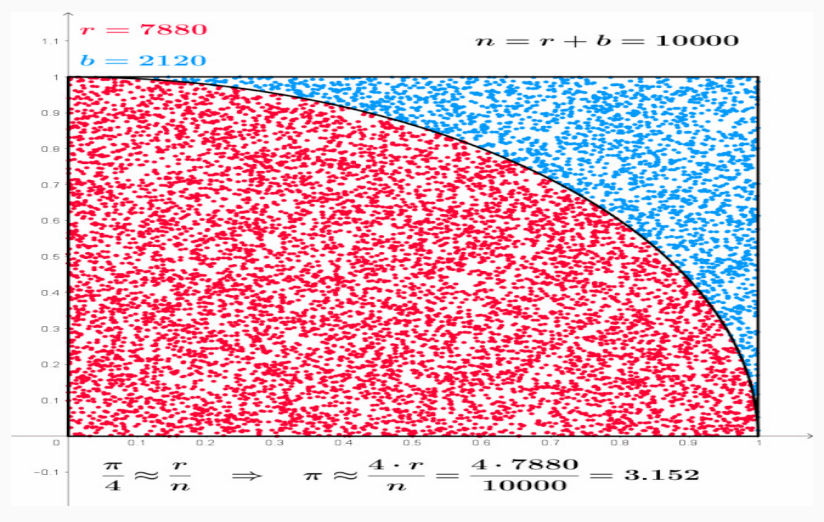

> $\pi$를 근사하는 과정 시각화

* $r_i \overset{\text{i.i.d.}}{\sim} U(0, 1)^2$, $\mathcal R$은 원의 일부분에 해당하는 영역.

$$\sum_{i=1}^n \mathbb I (r_i \in \mathcal R)/n \to \int_{[0, 1]^2} \mathbb I (r \in \mathcal R) dr = \text{Area of Partial Circle Region} =  \frac{\pi}{4}$$

a.e. as $n \to \infty$ (almost exactly)

`-` Example 2

1. $z_i \overset{\text{i.i.d.}}{\sim} p(z ~ | ~ y), ~ i \in [n]$
2. $\sum_{i=1}^n \mathbb I(z_i < c)/n \to \int_{-\infty}^{c} p(z ~ | ~ y) dz$

> posterior에서 c까지의 누적확률을 Monte Carlo Sampling으로 근사할 수 있음.
>
> 이에 따라 posterior median, quantile 등을 근사하는 데에 직접 사용할 수 있음.

* 참고: explicit formular의 경우 inverse-cdf. $F^{-1}(u), ~ U \sim U(0, 1)$에서 확률분포 추출함

### **C. Importance Sampling**

`-` 정의

* 서로 다른 분포 $p$와 known $q$에 대하여 $q$에서 샘플링된 데이터를 가중평균하여 타겟 분포 $p$에서 샘플링한 것과 동일한 효과를 내도록 만드는 방법

$$\sum_{i=1}^n f(z_i) \frac{p(z_i)}{q(z_i)}/n \to \int f(z) \frac{p(z)}{q(z)}q(z)dz = \int f(z)p(z)dz$$

where $z_i \overset{\text{i.i.d.}}{\sim} q(\cdot)$

* $\frac{p(z_i)}{q(z_i)}$를 가중치 $w_i$로 취급할 수 있다.
* $\mathbb E_q [w_i f(z_i)] = \int f(z) \frac{p(z)}{q(z)}q(z)dz = \int f(z)p(z)dz = \mathbb E_p [f(z)]$

`-` Properties

1. $w_i f(z_i)$의 기댓값은 $\mathbb E_p[f(z)]$이다. (unbiased)
2. $w_i f(z_i)$의 분산은 $\int \frac{f(z)^2p(z)^2}{q(z)}dz - \mathbb E_p [f(z)]^2$이다.
3. 추정량의 분산 (표본분산)은 다음과 같다.

$$\frac{1}{n}\sum_{i=1}^n \left( w_i f(z_i) - \sum_{i=1}^n w_i f(z_i)/n \right)^2$$

4. 만약 $q = |f|p/c$라면, minimal variance를 만들 수 있다. 이 경우 MC Sampling보다 더 낮은 분산을 가진다.

> $\sigma^2/n$보다 더 낮은 분산값을 가지게 만들 수도 있다. True 분포 $p$와 $f$간 교집합이 적은 상황에서, q를 적절히 설계한다면 샘플을 관심영역에 집중시켜 분산을 크게 줄일 수 있음.

### **D. Rejection Sampling**

`-` Motivation

* $p$의 formula는 알고 있으나, sampling이 어려울 때, $p(x)$를 위로 감싸는 단순한 개형의 envelop $M q(x)$를 고려한다.

$$p(x) ≤ Mq(x), ~ \forall x \in X$$

where $M > 0$

* 샘플링이 쉬운 분포 $q$를 이용해 간접적으로 $p$에서의 샘플링을 수행한다.

`-` Algorithm

1. $y \sim q$와, 그에 독립인 균등분포 확률변수 $u \sim U(0, 1)$을 고려한다.
2. $u < \frac{p(y)}{Mq(y)}$를 만족하는지를 확인한다. 만족한다면 해당 샘플을 택하고, 만족하지 않는다면 수용하지 않는다.

* 너무 많은 것들을 버리게 한다면, 즉, rejection rate가 높다면 효율성이 떨어진다.
* Importance Sampling은 모든 샘플을 사용한다는 점에서 해당 방법과 다르다.

`-` Properties

* Acceptance rate. 샘플이 accept될 확률

$$\mathbb P \left[ u < \frac{p(y)}{Mq(y)} \right] = \mathbb E[\mathbb I (u < \frac{p(y)}{Mq(y)})] = \mathbb E_q \mathbb E_u[\mathbb I (u < \frac{p(y)}{Mq(y)}) ~ | ~ y] = \mathbb E_q[\frac{p(y)}{Mq(y)}] = \frac{1}{M} \int p(y)dy = \frac{1}{M}$$

> $u$의 support가 $(0, 1)$이므로, 적분하면 지시함수 내부 값이 그대로 나옴

* Accept된 sample의 $y$값이 $t$보다 작거나 같을 확률 (cdf)

$$\begin{align}
\mathbb P \left[ y ≤ t ~ | ~ u < \frac{p(y)}{Mq(y)} \right] & = \mathbb P \left[ y ≤ t, ~ u < \frac{p(y)}{Mq(y)} \right] / \mathbb P \left[ u < \frac{p(y)}{Mq(y)} \right] \\
& = \int_{y ≤ t} \left( \int_{0}^{\frac{p(y)}{Mq(y)}} 1 ~ du \right) q(y) ~ dy \times \frac{1}{1/M} \\
& = M\int_{y ≤ t} \frac{p(y)}{Mq(y)} q(y) ~ dy \\
& = \int_{y ≤ t} p(y) ~ dy
\end{align}$$

> 즉, 채택된 샘플 $y$는 타겟 분포 $p$를 따른다.

`-` e.t.c.

* 높은 acceptance rate가 이상적이나, 쉽게 구축할 수 있는 envelop 함수는 일반적으로 낮은 acceptance rate를 가진다.
* $p$와 비슷한 개형의 좋은 $q$를 설정하는 것이 중요하다.

### **E. Markov chain**

`-` Definition (discrete)

확률변수열 $\{X_t\}_{t=0}^{\infty}$가 아래 조건을 만족하면, Markov chain이라고 한다.

$$P(X_t = v_t ~ | ~ X_{t-1} = v_{t-1}, \cdots, X_0 = v_0) = P(X_t = v_t ~ | ~ X_{t-1} = v_{t-1})$$

where $v_i \in \chi = \{1, 2, \cdots, k\}$

* 어느 시점에서도 transition의 확률은 동일하다. 즉, $P(X_t = s ~ | ~ X_{t-1} = r) = P(X_{t+1} = s ~ | ~ X_t = r)$이다.
* 체인이기 때문에 과거 시점은 현재를 거쳐 간접적으로 영향을 미친다.
* 현재 상태가 $r$일 때, 다음이 $s$일 확률을 $p_{rs}$라고 하면, transition probatility는 다음과 같다.

$$\mathbf{P} = 
\begin{bmatrix}
    p_{11} & \cdots & p_{1k} \\
    p_{21} & \cdots & p_{2k} \\
    \vdots & \ddots & \vdots \\
    p_{k1} & \cdots & p_{kk}
\end{bmatrix}$$

> 각 행은 현재의 특정 상태에 대한 다음 상태의 조건부 확률분포로써, $\sum_{j=1}^k p_{ij} = 1$이다.

`-` Notation

$$P_i(X_n = k) \overset{\text{def}}{=} P(X_n = v_k ~ | ~ X_0 = v_i)$$

* 초기 상태가 $v_i$일 때, $n$ 차시에서 상태 $v_k$에 있을 확률

$$T_i^{(r+1)} \overset{\text{def}}{=} \inf \{n ≥ T_i^{(r)} + 1 ~ | ~ X_n = v_i\}$$

where $T_i^{(1)} \overset{\text{def}}{=} \inf \{n ≥ 1 ~ | ~ X_n = v_i \}$

* $v_i$가 $r$번째로 관측되었을 때, 그 이후 다시 해당 값이 최초로 관측되기까지의 시간

`-` Markov Chain $(\lambda, \mathbf P)$이 Stationary Distribution으로 수렴하기 위한 조건

* state가 유한한 상황에서 Irreducibility를 만족한다면, Recurrency도 만족하는 등, 세 가지 조건은 어느정도 유기적으로 연결되어 있지만... 그정도 까지는...

1. Irreducibility

$$\begin{align}
& i \to j: \mathbb P_i (X_n = j, \exist n ≥ 0) > 0, ~ i,j \in \mathcal S \\
& i ↔ j: i \to j ~ \& ~ j \to i
\end{align}$$

* Communicating class $\mathcal S$: 서로 도달 가능한 모든 원소들의 집합
* 분포 내 모든 상태들은 서로 연결되어, 한 상태에서 출발했을 때 유한 단계 후에 다른 상태에 도달할 수 있다. 이는 양방향으로 연결되어 있다.

2. Recurrency

$$\mathbb P_i (T_i < \infty) = 1 ⇔ \sum_{n=0}^{\infty} P_i (X_n = i) = \infty$$

* 체인의 특정 상태에서 시작하여 다시 해당 상태로 반드시 유한 시간 내에 돌아올 수 있다.
* 시간이 무한히 커질 때, 해당 상태에 머무는 확률의 총합은 무한이 된다. 즉, 해당 상태가 무한번 나타난다.

3. Aperiodicity
* 체인에는 시점에 따른 특정한 주기가 존재하지 않는다. 한 개의 hidden distribution만 존재해야 한다.


> 세 조건은 충분조건으로, 모든 조건을 만족하지 않음에도 stationary distribution을 가질 수 있다.

`-` **Stationary distribution of Markov chain** $(\star \star \star)$

* Markov chain이 충분히 오래 진행되었을 때, 상태 분포가 변하지 않고 일정하게 유지되는 확률분포 $\pi$

$$\lambda^{\top} \mathbf P ^n \to \lambda^{\top} \tilde{\mathbf P} = \pi^{\top}$$

> 초기 분포 $\lambda$가 무엇이든 상관 없이, 충분한 시간이 지난 후에는 stationary distribution $\pi$로 수렴한다.
>
> burn-in: Chain이 늘어날수록, 초기값을 잊어버리고 stationary한 분포를 따르게 한다. 따라서 Markov chain 앞쪽 샘플은 stationary distribution에서 추출되었다 말하기 어려우므로, 대부분 제거하고 활용한다.
>
> $X_n = v_k$일 확률은 $\sum_i \mathbb P(X_n = v_k ~ | ~ X_0 = v_i) \mathbb P(X_0 = v_i)$로 나타나며, 이는 ${\mathbb P^n}^{\top}$의 $k$번째 원소에 해당한다.

* $\pi$는 stationary distribution이라고 불리며, $\pi^{\top} = \pi^{\top} \mathbf P$를 만족한다.

$$\pi^{\top} ≡ \lambda^{\top}\mathbf P^{n+1} = \lambda^{\top}\mathbf P^n \mathbf P \to \pi^{\top}\mathbf P$$

`-` Example

$$\mathbf P = \begin{bmatrix}
0.10 & 0.40 & 0.50 \\
0.50 & 0.45 & 0.05 \\
0.30 & 0.30 & 0.40
 \end{bmatrix}, ~~ \mathbf P^n \to \begin{bmatrix}
 0.31 & 0.39 & 0.30 \\
 0.31 & 0.39 & 0.30 \\
 0.31 & 0.39 & 0.30
\end{bmatrix}$$

* 초기 상태 $\lambda$를 어떻게 설정해도 Transition probatility $\mathbf P^n$이 수렴하면서 동일한 $\pi$를 얻을 수 있다.

`-` Ergodicity of Markov chain

* Markov Chain $\{ X_n \}$이 stationary distribution $\pi$를 가질 때,

$$\sum_{i=1}^n f(X_i) / n \to E_{\pi}[f(X)] ~ \text{a.e.}$$

as $n \to \infty$ where $f$ is a mesurable function.

> Markov chain에서의 LLN. 표본평균이 stationary distribution $\pi$의 기댓값으로 수렴한다.
>
> 하지만 표본 간 상관성이 존재하여 i.i.d. sample에서의 표본평균보다 분산이 더 높으므로 수렴의 속도가 i.i.d.보다 떨어진다. 경험적으로 3배 정도 차이가 난다고 한다.


* 일반적인 i.i.d. sample에서의 분산 $Var(\sum X_i / N) = \sigma^2/N$
* 정상 분포를 가지는 Markov chain에서의 분산 $Var(\sum X_i/N) = \frac{\sigma^2}{N}(1 + \delta),~\delta > 0$

> $\delta$는 경험적으로 계산 가능하며, 분산이 동등하기 위해서는 $N + \alpha$ 만큼의 샘플이 필요하다.
>
> Chain을 늘일 수록, 대수의 법칙에 따라 분산은 개선된다. 하지만 상황에 따라 effective sample size가 낮게 형성된다면, 체인의 효율이 매우 떨어진다면, 실제로 사용하기 어려울 수 있다.

* 앞쪽을 전부 태워서(burn-in), stationary distribution에 가까운 샘플들만을 사용하고, 샘플 간 상관성을 해소하기 위해 먼 간격으로 샘플을 택하는 thinning을 수행하기도 한다.

### **F. MH algorithm**

모든, 거의 왠만한 문제에 다 사용할 수 있는 알고리즘. 깁스 샘플링도 중요하지만, 뺐음...

`-` Continuous version of Markov chain

$$\mathbb P (X_{t+1} \in \mathcal B ~ | ~ X_t = x, X_{t-1}= \cdots) = \int_{\mathcal B}k(x, y)dy$$

* $k$는 현재 상태 $x$에서, 다음 상태 $y$로 갈 확률을 정해주는 density이다. 즉, 위 식은 이전 상태가 주어졌을 때, 어떤 measurable set $\mathcal B$에 대한 확률을 계산한다.
* 커널은 가장 일반적인 형태로, 다음 상태가 이전 값을 평균으로 하는 분포를 따르도록 한다. $X_t = x, ~ X_{t+1} = y \sim N(x, \sigma^2)$

`-` Stationary 조건 하에서, 아래가 성립 ($\pi$가 stationary distribution)

$$\int k(x, y)\pi(x)dx = \pi(y), ~ \int k(y, x)\pi(y)dx = \pi(y)$$

* 어떤 분포 $\pi$가 stationary distribution이라면, 전이 후에도 분포가 불변해야 한다.
* 어떤 measurable set $\mathcal B$에 대해서도 $\pi(y \in \mathcal B) = \pi(x \in \mathcal B)$가 성립한다고 할 때, 다음과 같은 detailed balance condition을 유도해낼 수 있다.

$$k(x, y)\pi(x) = k(y, x)\pi(y)$$

> 어떤 구간을 잡아도, 전이 전과 후의 확률 질량은 같다...?


* 이거라는 건가?
$$k(x, y)\pi(x) = k(y, x)\pi(y) \Rightarrow \int k(x, y)\pi(x)dx = \pi(y) = \int k(y, x)\pi(y)dx = \pi(x)$$

* By the stationary condition

$$\int k(x, y)\pi(x)dx = \pi(y), ~ $$

> stationary distribution $\pi$을 가진다면, 이것을 어떤 방식으로 확인할 수 있는지를 알려줌.
>
> $\pi$를 지정하고, $k(x, y)\pi(x) = k(y, x)\pi(y)$를 만족하는 $k$를 어떻게든 만들자는 것이 MH 알고리즘.

`-` Metropolis-Hastings Algorithm

* detailed balance condition, irreducibility를 핵심 원리로 삼음

1. target distribution $\pi$를 설정
2. 커널 $k(x, y)$를 선택하고, $X_t = x$가 주어졌을 때에 $y$를 샘플링
3. $\alpha_{xy}$를 계산

$$\alpha_{xy} = \min \left\{ 1, \frac{k(y, x)\pi(y)}{k(x, y)\pi(x)} \right\}$$

4. $U \sim U(0, 1)$를 샘플링
5. $U ≤ \alpha_{xy}$라면, $X_{t+1} = y$로 수용. 그렇지 않다면 $X_{t+1} = 1$로 설정.

> Accept Rate $\alpha_{xy}$가 너무 낮으면 계속 같은 값이 샘플링되므로, 가능하면 $\alpha_{xy}$가 높기를 바란다.
>
> $k(x, y) \approx k(y, x)$라고 보면, $\pi(y) > \pi(x)$일 때 무조건 변화한다.

`-` The detailed balance condition for the MH.

$$\begin{align}
\pi(x)k(x, y) & = \pi(x) (1-\alpha_{xy}) \delta_x (y) + \pi(x) \alpha_{xy} h(x, y) \\
& = \pi(y)(1-\alpha_{yx}) \delta_y (x) + \pi(y) \alpha_{yx} h(y, x) \\
& = \pi(y)k(y, x)
\end{align}$$

* $\delta_x(y): y = x$일 때만 확률을 가지는 분포

`-` Selection of $k$

1. $k(x, y) ≡ N(y~|~x, \sigma^2) \Rightarrow k(x, y) = k(y, x)$ and $\alpha_{xy} = \pi(y)/\pi(x)$. $k(\cdot, \cdot)$를 계산하지 않아도 accept rate를 구할 수 있다.
> 이 경우 순전히 $\pi(x), \pi(y)$의 상대적 비율에 따라서만 움직인다. $\pi$의 density가 낮은 영역에서는 자연스레 샘플링이 적게 된다. (쌍봉 분포를 가지는 경우 이를 가끔 오가게 되어 한 봉우리에 오래 머문다.)
2. $k(x, y) ≡ N(y~|~0, \sigma^2)$ and $\alpha_{xy} = \exp (-0.5 (x^2 - y^2)/\sigma^2)\pi(y)/\pi(x)$
3. $k(x, y) ≡ \pi(y) \to \alpha = 1$. sampling을 $\pi$ 그 자체에서 수행. 하지만 애초에 $\pi$에서 샘플링하기가 어려워서 MCMC를 사용하는 것이므로 효용은 없다.

## 6. Naive Bayes

### **A. Intro. to Bayesian Classification**

* 대부분의 기계학습 모형에서의 분류 $\mathbb P(y = c~|~x):$ 조건부 확률을 모델링
* 베이지안에서의 분류 $\mathbb P(y = c~|~x) = \frac{p(x~|~y)p(y)}{p(x)}:$ $(x, y)$는 random parameters

> $p(x)$는 정규화 항으로 취급하여 분자를 알면 구할 수 있다.
>
> $p(y)$는 클래스 빈도만 계산하면 구할 수 있다.
>
> $p(x~|~y)$의 경우, 클래스별로 분포를 계산해줘야 하며, $x$가 고차원일 수록 결합 분포의 산출은 더욱 복잡해진다. 따라서 density의 계산이 매우 어렵다.

`-` Projection to a simple space

1. $p(z~|~x)\approx \prod_{i=1}^p p(z_i~|~x):$ 조건부 독립 conditional independent 조건
> 고차원의 분포를 특징별 조건부 확률의 곱으로 근사
2. $f(x) ≡ \sum_{i=1}^p f(x_i):$ 복잡한 다차원 함수를 interaction term이 없다고 가정하여 개별 변수의 함수로만 나타냄. GAM

### **B. Naive Bayes**

`-` Motivation of marginal projection where $x \in \mathbb R^d$ and $x_i \in \{0, 1\}$. (binary features)

* Joint distribution을 정확히 모델링할 경우: $x$의 cardinality는 $2^d$이므로, 총 $2^d - 1$개의 파라미터 설정이 필요하다.
* 각 변수를 조건부 독립으로 설정할 경우: 각 차원마다 하나의 파라미터만 설정하면 되므로, $d$개의 파라미터만으로 분포 표현이 가능하다.

`-` Example: weather data

$$\begin{align}
p(\text{Yes}~|~x) & \propto p(x~|~\text{Yes})p(\text{Yes}) \approx p(\text{Yes})\prod_{i-1}^d p(x_i~|~\text{Yes}) \\
p(\text{No}~|~x) & \propto p(x~|~\text{No})p(\text{No}) \approx p(\text{No})\prod_{i-1}^d p(x_i~|~\text{No}) \\

\frac{p(x~|~\text{Yes})p(\text{Yes})}{p(x~|~\text{No})p(\text{No})} & = \alpha \Rightarrow p(\text{Yes}~|~x) \approx \alpha/(\alpha+1)
\end{align}$$

또는...

$$p(\text{Yes}~|~x) = \frac{p(x~|~\text{Yes})p(\text{Yes})}{p(x~|~\text{Yes})p(\text{Yes}) + p(x~|~\text{No})p(\text{No})}$$

`-` Example of continuous version

1. $p(y~|~x) \propto p(x~|~y)p(y) = N(x_1~|~\mu_1,\sigma_1^2)N(x_2~|~\mu_2, \sigma_2^2)$
2. 변수 간 조건부 독립을 가정. 변수별로 평균과 분산만 필요

`-` (다루지 않았음) Laplace smoothing: 0으로 확률값이 나오는 것을 방지

$$p(x~|~y) = \frac{\text{number of events} + \alpha}{\text{total number of observations} + k\alpha}$$

* 한 번도 관측되지 않은 값이 학습 데이터에 존재할 경우 불가능한 사건으로 취급됨. $p(x_i~|~y) = 0 \to p(x~|~y)=0$
* 이산형 변수 $x$에 대해서 한 번도 나오지 않은 경우에도 0이 아닌 작은 확률을 부여


`-` (다루지 않았음) Kononenko's information gain: contribution of attribute

$$\log_2 p(c~|~x) - \log_2 p(c)$$

* 특정 attribute의 중요도를 측정. 특정 attribute가 클래스 예측에 얼마나 기여했는지를 측정

## 7. Variational Bayes

`-` motivation

* sampling은 고차원 데이터에서 너무 느리다. 일반적으로 bayesian sampling의 어려움은 Correlated Posterior에서 비롯된다.
* full posterior를 직접 사용하지 말고, 비교적 단순한 분포 $q_{\phi}(\theta)$를 이용하여 근사한 뒤 사용하자.

`-` Key of variation Bayes

* Posterior를 확률 벡터의 원소들이 독립인 공간으로 사영

$$p(\theta~|~y)\approx q_{\phi}(\theta) = \prod_{i=1}^d q_{\phi} (\theta_i)$$

* $q_{\phi}$는 근사 posterior이고, 주로 가우시안으로 설정
* $\phi$는 분포 $q$의 파라미터

`-` KL fivergence

$$\text{KL}(f~||~g) = \inf f(s) \log \frac{f(s)}{g(s)} ds$$

* Properties

1. $f = g ⇔ \text{KL}(f~||~g) = 0$. 두 함수가 같아야 0이 됨
2. $\text{KL}(f~||~g) ≥ 0$.
3. $\text{KL}(f~||~g) \neq \text{KL}(g~||~f)$.
4. g의 서포트가 f의 서포트를 포함하고 있어야 정의됨. supp $(f) ⊂$ supp $(g)$

`-` ELBO: Evidence of Lower BOund

$$\begin{align}
\log p(y) & = \log \int p(y~|~\theta)p(\theta) d\theta \\
& = \log \int \frac{p(y~|~\theta)p(\theta)}{q_{\phi}(\theta)}q_{\phi}(\theta)d\theta \\
& ≥ \underbrace{\int \log \frac{p(y~|~\theta)p(\theta)}{q_{\phi}(\theta)}q_{\phi}(\theta)d\theta}_{\text{ELBO}}
\end{align}$$

* $f(x) = \log x$는 concave function이므로, Jensen's inequality를 적용시켜 evidence의 하한을 지정할 수 있다.


$$\begin{align}
\log p(y) - \mathbb E_{q_{\phi}} \left[ \log \frac{p(y~|~\theta)p(\theta)}{q_{\phi}(\theta)} \right] & = \mathbb E_{q_{\phi}}\left[ \log p(y) - \log \frac{p(y~|~\theta)p(\theta)}{q_{\phi}(\theta)} \right] \\
& = \mathbb E_{q_{\phi}} \left[ \log \frac{p(y)q_{\phi}(\theta)}{p(y~|~\theta)p(\theta)} \right] \\
& = \mathbb E_{q_{\phi}} \left[ \log \frac{q_{\phi}(\theta)}{p(\theta~|~y)}\right] \\
& = \int \log \frac{q_{\phi}(\theta)}{p(\theta~|~y)} q_{\phi}(\theta) d\theta \\
& = \text{KL}(q_{\phi}(\theta)~||~p(\theta~|~y)) ≥ 0
\end{align}$$

> ELBO는 $\log$-evidence의 하한이고, 이를 최대화하면 $\text{KL}(q_{\phi}(\theta)~||~p(\theta~|~y))$를 최소화하는 것과 동일하다.

`-` ELBO 분해

$$\begin{align}
\mathbb E_{q_{\phi}} \left[ \log \frac{p(y~|~\theta)p(\theta)}{q_{\phi}(\theta)} \right] & = \mathbb E_{q_{\phi}} \left[ \log p(y~|~\theta) \right] + \mathbb E_{q_{\phi}} \left[ \log \frac{p(\theta)}{q_{\phi}(\theta)} \right] \\
& = \mathbb E_{q_{\phi}} \left[ \log p(y~|~\theta) \right] - \text{KL}\left( q_{\phi}(\theta)~||~p(\theta) \right)
\end{align}$$

$$-\mathbb E_{q_{\phi}} \left[ \log p(y~|~\theta) \right] + \text{KL}\left( q_{\phi}(\theta)~||~p(\theta) \right)$$

* ELBO를 최대화하는 문제는 음수를 취하여 최소화 문제로 치환할 수 있다.
* 첫 번째 항은 loss function에 관련되어 있으며, 두 번째 항은 penalty function과 관련된다.